# Ising Lattice Results (with optimization)
> 53min -> 2.99min

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import IsingLatticeClass_fast as ilc

In [12]:
n = [2,3,4,5]
T = np.arange(0.05, 4, 0.05)

C = np.zeros(len(n))
M = np.zeros(len(n))

In [13]:
results = ilc.property_pure_compute_jit(T=T, num_cols=n, num_rows=n, J=1,
                                compute_H=False, compute_H2=False, compute_M=False, compute_M2=True, compute_C=True
                                )
# results[n][T][H, H2, M, M2, C, M_abs, M2_abs]
np.save('results.npy', results)
results

array([[[ 6.13969928e+069, -8.00000000e+000,  6.40000000e+001,
          0.00000000e+000,  1.00000000e+000,  0.00000000e+000],
        [ 1.10812448e+035, -8.00000000e+000,  6.40000000e+001,
          0.00000000e+000,  1.00000000e+000,  0.00000000e+000],
        [ 2.90671441e+023, -8.00000000e+000,  6.40000000e+001,
          0.00000000e+000,  1.00000000e+000,  0.00000000e+000],
        ...,
        [ 2.82260872e+001, -4.45696260e+000,  3.67911278e+001,
          0.00000000e+000,  6.36847287e-001,  2.85488482e-001],
        [ 2.78128726e+001, -4.40043514e+000,  3.63868868e+001,
         -3.19340772e-017,  6.31208898e-001,  2.79800417e-001],
        [ 2.74209218e+001, -4.34503657e+000,  3.59921888e+001,
          3.23905384e-017,  6.25690769e-001,  2.74200386e-001]],

       [[ 4.43653060e+156, -1.80000000e+001,  3.24000000e+002,
          0.00000000e+000,  1.00000000e+000,  0.00000000e+000],
        [ 2.97876840e+078, -1.80000000e+001,  3.24000000e+002,
          0.00000000e+000,  1.000

In [14]:
results[0,:,4]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 0.9999999 , 0.99999944,
       0.99999759, 0.9999919 , 0.99997742, 0.9999456 , 0.99988347,
       0.99977306, 0.99959141, 0.99931099, 0.99890049, 0.99832594,
       0.99755193, 0.99654284, 0.99526414, 0.99368345, 0.99177151,
       0.98950293, 0.9868568 , 0.98381704, 0.98037266, 0.97651772,
       0.97225127, 0.96757712, 0.96250349, 0.9570426 , 0.95121022,
       0.94502515, 0.93850873, 0.93168431, 0.92457676, 0.91721201,
       0.90961657, 0.90181719, 0.8938405 , 0.88571266, 0.87745915,
       0.86910451, 0.86067222, 0.85218452, 0.84366237, 0.83512531,
       0.82659148, 0.81807761, 0.809599  , 0.80116955, 0.79280184,
       0.78450712, 0.77629544, 0.76817563, 0.76015544, 0.75224161,
       0.74443987, 0.73675509, 0.72919133, 0.72175187, 0.71443932,
       0.70725566, 0.70020233, 0.69328022, 0.68648981, 0.67983114,
       0.6733039 , 0.66690745, 0.6606409 , 0.65450306, 0.64849

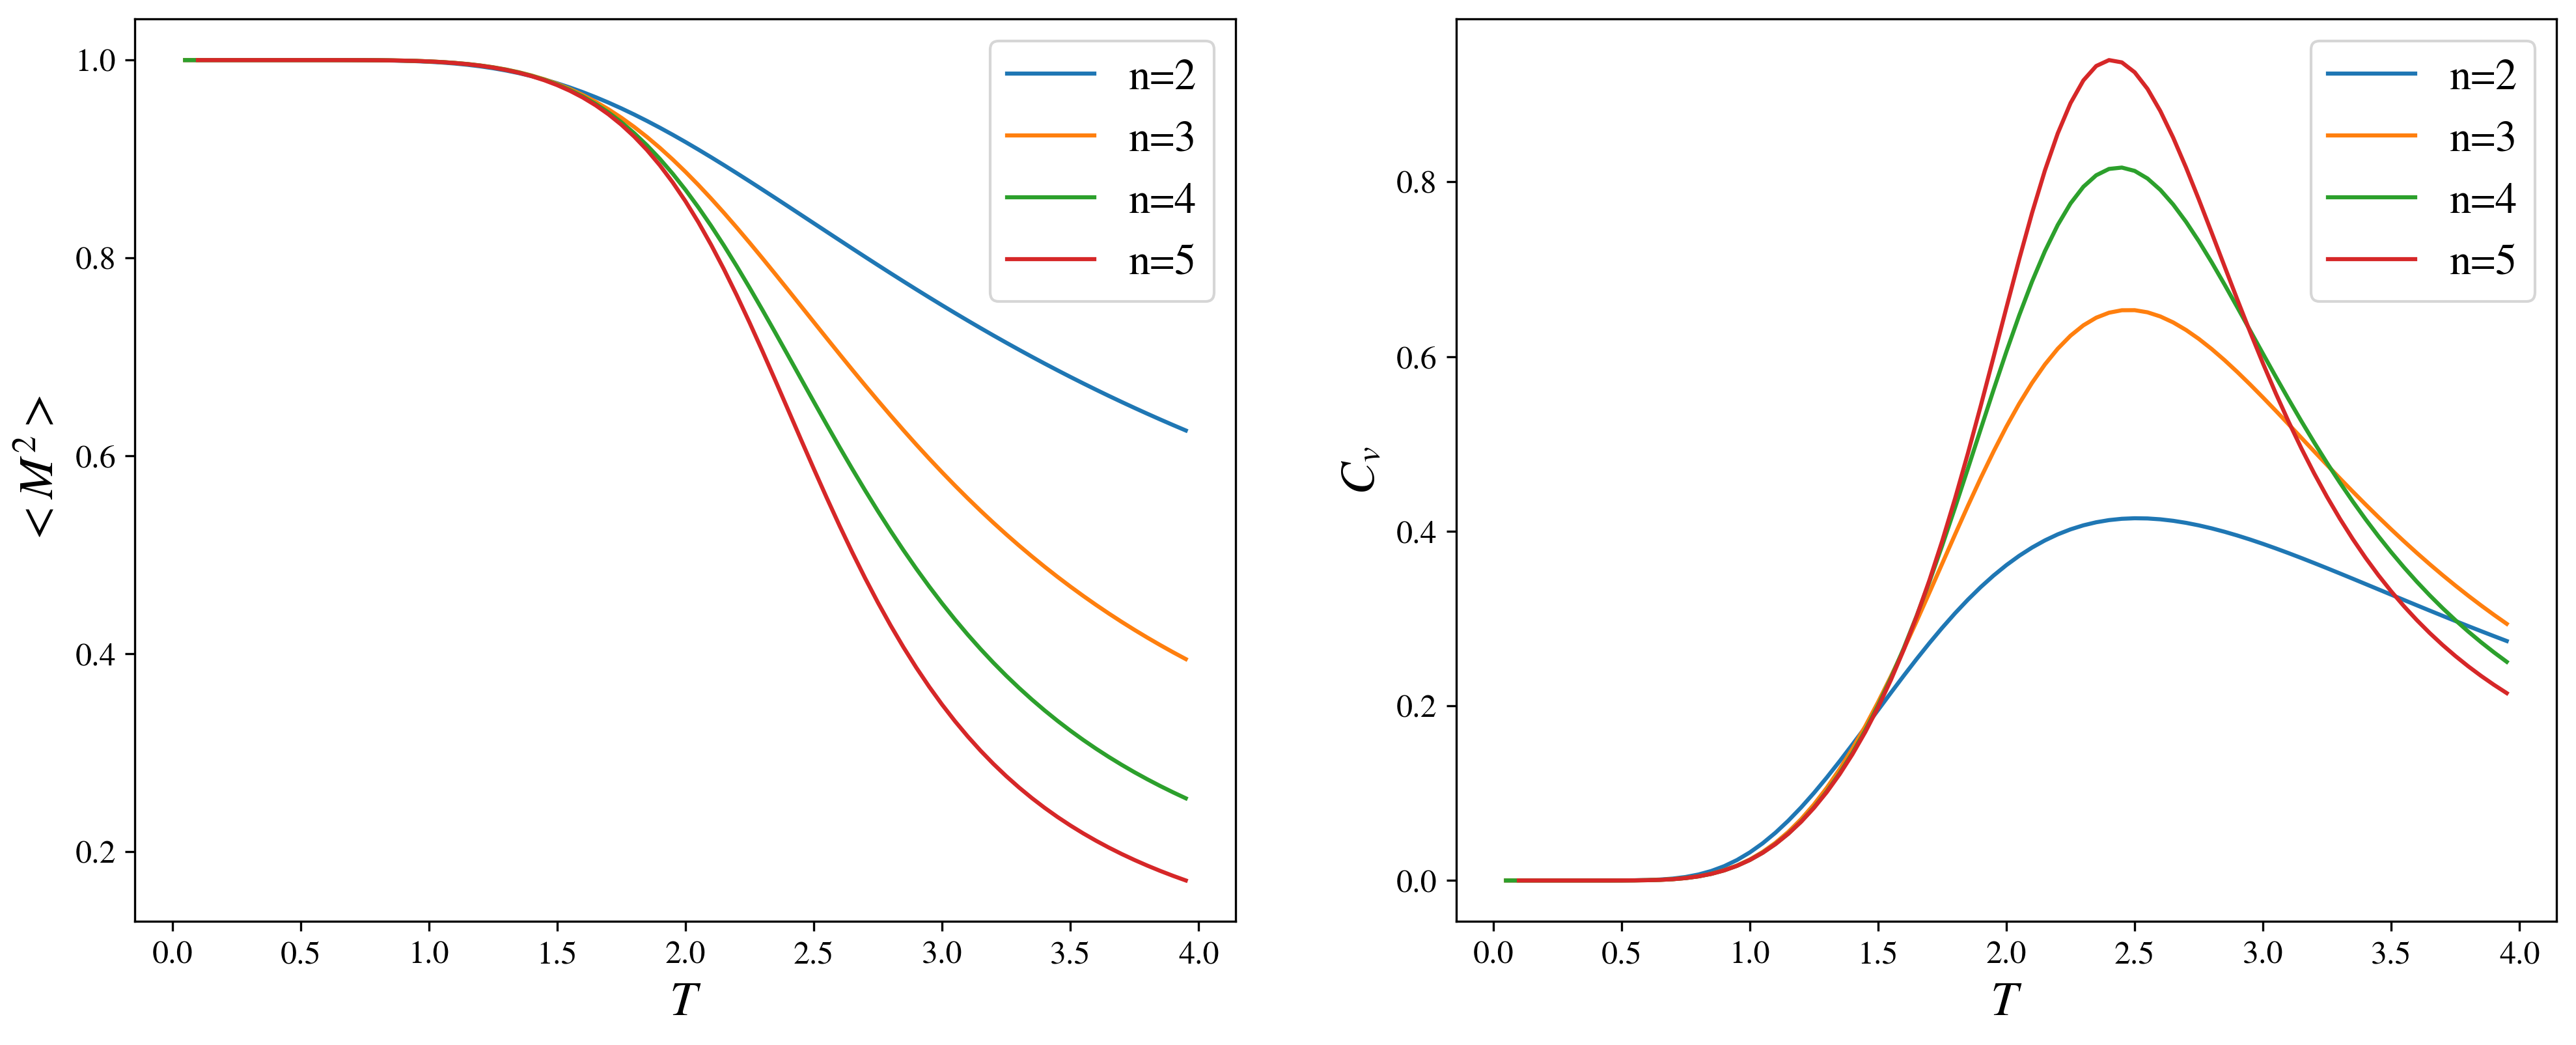

In [15]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
config = {
            "font.family": 'Nimbus Roman',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

# 创建画布和坐标轴
fig= plt.figure(figsize=(16,6),dpi=300)

# 0 1         2          3         4          5
# Z average_H average_H2 average_M average_M2 average_C

plt.subplot(121)
for i in range(len(n)):
    plt.plot(T, results[i,:,4], label='n='+str(n[i]))

plt.legend(fontsize=16)
plt.xlabel('$T$', fontsize=18)
plt.ylabel('$<M^2>$', fontsize=18)

plt.subplot(122)
for i in range(len(n)):
    plt.plot(T, results[i,:,5], label='n='+str(n[i]))

plt.legend(fontsize=16)
plt.xlabel('$T$', fontsize=18)
plt.ylabel('$C_v$', fontsize=18)

plt.savefig(r'/home/sjtu/Workspace_ygj/CP2024_code/picture/data/Cv_M2_2.png')

# Ising Lattice class test

JO
 1.0

num_spin
 36

state
 [[ 1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]]

maxrep_spin
 68719476735

energy
 -56.0

magnetization
 -32

index
 21

neighbour
 {'up:index30': -1, 'right': -1, 'down': -1, 'left': -1, 'current': 1}


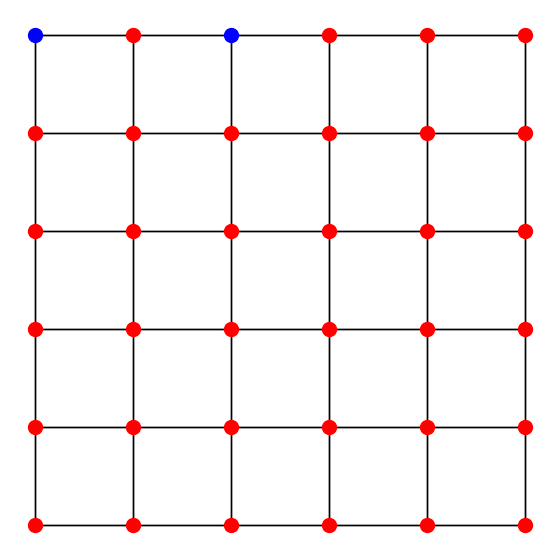

In [16]:
# Example usage:

rows = 6
cols = 6
system = ilc.IsingLattice(rows, cols)

configurations = 5
system.set_spin_configuration(configurations)

# constant
print('JO\n', system.JO())
print('\nnum_spin\n', system.num_spins())
print('\nstate\n', system.get_spin_state_all())
print('\nmaxrep_spin\n', system.maxrep_stateQ())

# property
print('\nenergy\n', system.calculate_total_energy())
print('\nmagnetization\n', system.calculate_total_magnetization())

# choose one
print('\nindex\n',system.get_index(3,3))
print('\nneighbour\n', system.get_neighbours(0, 0))
system.get_picture_of_spin('try1')


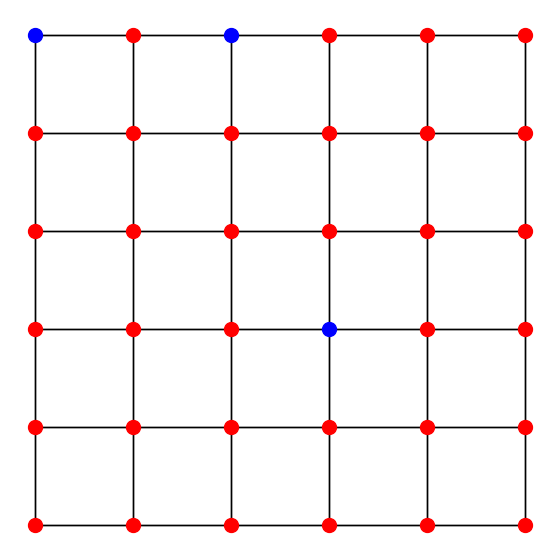

In [17]:
system.set_up_spin(3,3)
system.get_picture_of_spin('try2')

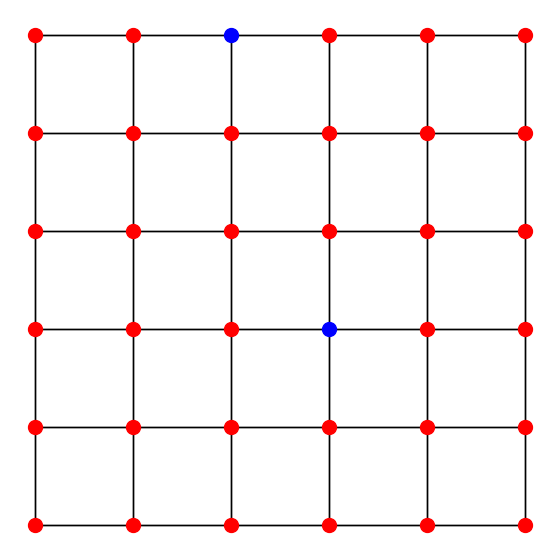

In [18]:
system.set_dw_spin(0,0)
system.get_picture_of_spin('try3')

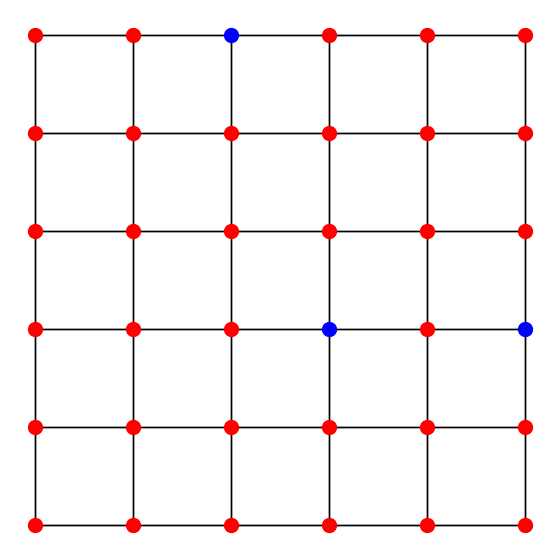

In [19]:
system.flip_spin(3,5)
system.get_picture_of_spin('try4')

In [20]:
# property
print('\nenergy\n', system.calculate_total_energy())
print('\nmagnetization\n', system.calculate_total_magnetization())

system.change_J(-2)
print('\nJO\n', system.JO())

# property
print('\nenergy\n', system.calculate_total_energy())
print('\nmagnetization\n', system.calculate_total_magnetization())



energy
 -48.0

magnetization
 -30

JO
 -2

energy
 96.0

magnetization
 -30
